# Vigenere Cipher Solver

The Vigenere Cipher is a substitution cipher, letters in the text are shifted in the alphabet depending on their position in the text and depending on the keyword which is used to encode the text. Certain properties of the text cannot be hidden by using a Vigenere Cipher, such as the frequency of certain letters in the text and the position of certain combinations of letters. These features allow the cipher to be broken algorithmically, so long as the text is sufficiently long relative to the key. 

This code below uses different techniques to find the length of the keyword which is used to encode the message, and then looks at the distribution of letters in the text to find the specific keyword which was used to encode the message.

**To test this code yourself, do the following:**

* Paste a piece of lowercase text below

* Choose a 'key' to encrypt the text with

* From the menu above, click "Cell", then "Run All"

* Check to see if the code has deciphered the text and successfully guessed the key


* If you want to you can test 3 different algorithms used to calculate the key length, by going to the "Choose Algorithm" section below

# Paste Text Here:

Paste lowercase text inside the quotation marks below, any uppercase letters and punctuation will be deleted from the text.

In [115]:
text = "this card often symbolizes a crisis that cannot be avoided, a profound change that needs to beconfronted and accepted. it evokes the idea of a teacher, a therapist, or a guide. but in a crisis,there is an equal possibility that the hermit will renew himself or die. he therefore also refersto poverty, solitude, and even decay and degeneration. he can be seen as a vagrant or evenan alcoholic who is hiding a quart of red wine in his lantern"

# Paste Key Here:

Paste a lowercase alphabetical key inside the quotation marks below.

Keys of 20 letters or less can be identified by the code. If you want to use a key longer than this then you must change the variable "key_lengths_upper_limit" in the cell just below the heading "twist algorithm".

In [116]:
key = "whatisthecode"

# Code Below:

At the bottom of the document the code will display it's guess of the key or likely keys, as well as the decrypted text.

Throughout the document the code will print out text, arrays and graphs which are used for checking the code at each stage.

In [117]:
#This part of the code is taking out and spaces, upper case letters or punctuation in the text

alphabet = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
edit = ""
for i in text:
    for j in alphabet:
        if i==j:
            edit = edit+i
print(edit)
len(edit)

thiscardoftensymbolizesacrisisthatcannotbeavoidedaprofoundchangethatneedstobeconfrontedandaccepteditevokestheideaofateacheratherapistoraguidebutinacrisisthereisanequalpossibilitythatthehermitwillrenewhimselfordiehethereforealsoreferstopovertysolitudeandevendecayanddegenerationhecanbeseenasavagrantorevenanalcoholicwhoishidingaquartofredwineinhislantern


353

In [118]:
#This part of the code is encrypting the Text with the key

s1 = (len(edit)//len(key))*key + key[:(len(edit)-(len(edit)//len(key)*len(key)))]

encrypted = ""
for i in range(0,len(edit)):
    j = edit[i]
    k = s1[i]
    number = alphabet.index(j) + alphabet.index(k)
    encrypted = encrypted + alphabet[number % 26]
print(encrypted)

poilkskkshhhrofmuwdbgiuofvezilbztagcbqspietdgbkifosvkmonvvvoepuhxdhtgmwwzxqphgkufkwfmlhcbgeyjeibwwpxgjroaztamawleqtdxahcamjtalgfdtezthzszbmfseyppntkjbzmuhkinlilifxxyczssoziuqdbacvvdxpoeamjfpxywopnlnxezbtwgzisnkixpwmoitsisnlaeagkljgfvxkwoomjmfwqzlxqketvvxciprhgwfaglvxnipsueppogpwvhrdsviaualintnvcbwsnlvxvsghpeckshpcppgbzlkrlrchqnijmvjtsgaeuebvzbzpcbwinu


**The Twist Algorithm**

When text is encoded with a keyword the distribution of letters in it becomes more uniform. It also uses the fact that in smaller samples of text the distribution of letters becomes more extreme, the most common letters in english will be even more common in a small sample than in a big sample of text. This also applies to the least common letters, they will become even more rare in a sample of 50 characters out of a 1000 character piece of text. 

By looking at 'n' letter repeating segments (e.g each letter in positions a,b and c seperately for the sequence abcabcabcabc..), the twist algorithm attempts to find the 'n' for which the distribution of letters becomes more extreme. When the sample becomes more extreme we know we have found the correct 'n'.

After finding the length of the keyword, we can identify the specific keyword used.

In [119]:
#Twist Algorithm for Keyword Length

#key lengths range 0 to 20
key_length_upper_limit = 20
all_key_lengths = {}
for m in range(1,key_length_upper_limit+1):
    nth_letter_2 = {}
    for i in range(0,m):
        nth_letter_2[i] = encrypted[i::m]
    all_key_lengths[m] = nth_letter_2
#print(all_key_lengths)

all_key_frequencies = {}
for k,dicts in all_key_lengths.items():
    letter_frequencies = {}
    for i,j in dicts.items():
        letter_counts = {}
        for letter in j:
            if letter not in letter_counts:
                letter_counts[letter]=0
            letter_counts[letter]+=1
        letter_frequencies[i]=letter_counts
    all_key_frequencies[k]=letter_frequencies
#print(all_key_frequencies)

all_key_letters = {}
for length in all_key_frequencies:
    sub_dict = {}
    for num in all_key_frequencies[length]:
        letters_in = []
        for letter in all_key_frequencies[length][num]:
            letters_in.append(letter[0])
        sub_dict[num]=letters_in
    all_key_letters[length]=sub_dict
    
#print(all_key_letters)

all_key_frequencies_complete = all_key_frequencies
for j in alphabet:
    for index in all_key_letters:
        for i in all_key_letters[index]:
            if j not in all_key_letters[index][i]:
                all_key_frequencies_complete[index][i][j]=0
                
#print(all_key_frequencies_complete)


all_key_frequencies_complete_sorted = {}
for index in all_key_frequencies_complete:
    sub_dict = {}
    for i in all_key_frequencies_complete[index]:
        sub_dict[i] = (sorted(all_key_frequencies_complete[index][i].items(),key=lambda letters: letters[1], reverse=True))
    all_key_frequencies_complete_sorted[index] = sub_dict

#print(all_key_frequencies_complete_sorted)

all_key_percentages = {}
for i in all_key_frequencies_complete_sorted:
    sub_dict = {}
    for j in all_key_frequencies_complete_sorted[i]:
        percentage_list_2 = []
        if (j-1)<=(len(edit)%i):
            divisor = (len(edit)//i)+1
        else:
            divisor = len(edit)//i
        
        for k in all_key_frequencies_complete_sorted[i][j]:
            tuple_new = (k[0],k[1]/divisor)
            percentage_list_2.append(tuple_new)
        sub_dict[j] = percentage_list_2
    all_key_percentages[i]=sub_dict

print(all_key_percentages)

{1: {0: [('p', 0.059322033898305086), ('i', 0.05649717514124294), ('v', 0.05084745762711865), ('s', 0.0480225988700565), ('g', 0.0480225988700565), ('l', 0.04519774011299435), ('w', 0.04519774011299435), ('e', 0.04519774011299435), ('z', 0.04519774011299435), ('k', 0.0423728813559322), ('h', 0.0423728813559322), ('b', 0.0423728813559322), ('a', 0.0423728813559322), ('x', 0.0423728813559322), ('o', 0.03954802259887006), ('t', 0.03954802259887006), ('m', 0.03672316384180791), ('n', 0.03672316384180791), ('f', 0.03389830508474576), ('c', 0.031073446327683617), ('u', 0.02824858757062147), ('j', 0.025423728813559324), ('d', 0.022598870056497175), ('q', 0.01977401129943503), ('r', 0.01694915254237288), ('y', 0.011299435028248588)]}, 2: {0: [('i', 0.06779661016949153), ('g', 0.062146892655367235), ('e', 0.062146892655367235), ('p', 0.05649717514124294), ('s', 0.05649717514124294), ('h', 0.05649717514124294), ('t', 0.05649717514124294), ('k', 0.05084745762711865), ('v', 0.05084745762711865), (

In [120]:
Cj_dict = {}
for i in all_key_percentages:
    final_list = [0*l for l in range(0,26)]
    for j in all_key_percentages[i]:
        Cj_list = [k[1] for k in all_key_percentages[i][j]]
        final_list = [final_list[n]+Cj_list[n] for n in range(0,len(Cj_list))]
    Cj_dict[i]=final_list

#print(Cj_dict)

twists = {}
for i in Cj_dict:
    twist = 0
    for j in enumerate(Cj_dict[i]):
        if j[0]<=12:
            twist+=j[1]
        else:
            twist-=j[1]
    twist=twist*(100/i)
    twists[i]=twist

#Using the twist+ algorithm
twistplus = {}
twistlist = [x[1] for x in twists.items()]
for i in twistlist:
    subtract = 0
    for j in range(0,twistlist.index(i)):
        subtract+=(twistlist[j]/twistlist.index(i))
    number = i - subtract
    if twistlist.index(i)!=0:
        twistplus[twistlist.index(i)+1]=number

def twist_key(dict):
    mode_value = 0
    for i,j in dict.items():
        if j>mode_value:
            mode = i
            mode_value = j
    return mode

def twistplus_key(dict):
    modevalue = 0
    for i,j in dict.items():
        if j>modevalue:
            mode=i
            modevalue=j
    return mode

print("The twist+ algorithm Key Length is: %d" % twistplus_key(twistplus))
print("The twist algorithm Key Length is: %d" % twist_key(twists))

The twist+ algorithm Key Length is: 13
The twist algorithm Key Length is: 13


# Kasiski Algorithm

Below is code which aims to use the kasiski algorithm to find the key length, this is done by looking for groups of repeated letters within the encoded text.

In [121]:
#Produce all repeated n letter segments
n = 3
elements = []
for i in range(0,len(encrypted)):
    if i<(len(encrypted)-n+1):
        j=0
        string = ""
        while j<n:
            string = string + encrypted[i+j]
            j+=1
        elements.append(string)

duplicates = {}
for i in elements:
    if i not in duplicates:
        duplicates[i]=0
    duplicates[i]+=1

filtered = {}
for i,j in duplicates.items():
    if j!=1:
        filtered[i]=j
print(filtered)

#Letter frequency analysis

{'ksh': 2, 'zta': 2, 'amj': 2, 'isn': 2, 'snl': 2, 'lvx': 2, 'cbw': 2}


In [122]:
#Guessing Key Length with Kasiski Algorithm
def indexes(words,word):
    results = []
    for i in range(0,len(words)):
        try:
            index = words.index(word,i)
        except:
            break
        if index not in results:
                results.append(index)
    return results

numbers = []
for i in range(0,len(filtered)):
    numbers.append(indexes(elements,list(filtered)[i]))

difference =[]
for i in numbers:
    for j in range(0,len(i)-1):
        difference.append(i[j+1]-i[j])
print("The different spaces between %s letter repeated segments are %s" % (n,difference))

#Factorizing Algorithm
def factorize2(number):
    while number>1:
        for i in range(2,number+1):
            if number%i==0:
                number = int(number/i)
                yield i
                break

kas_factors={}
for i in range(2,len(encrypted)):
    counts=0
    for d in difference:
        if d%i==0:
            counts+=1
    if counts!=0:
        kas_factors[i]=counts

kas_mode = 0
for i in kas_factors:
    x = kas_factors[i]
    if x>=kas_mode:
        kas_mode=i
print("The Kasiski Algorithm key length is %s" % kas_mode)
        

The different spaces between 3 letter repeated segments are [303, 74, 65, 13, 78, 36, 52]
The Kasiski Algorithm key length is 13


# Choose Which Algorithm to Test:

In the Cell below write either "Twist+", "Twist" or "Kasiski" to test one of the algorithm's key lengths.

In [123]:
algorithm = "Twist+"

# Letter Frequency Analysis

After using the twist algorithm to find the length of the key, the actual key can now be guessed by seperating the encoded text into 'n' texts. Where 'n' is the assumed length of the key.

In [124]:
if algorithm=="Twist+":
    mode=twistplus_key(twistplus)
if algorithm=="Twist":
    mode=twist_key(twists)
if algorithm=="Kasiski":
    mode = kas_mode

nth_letter = {}
for i in range(0,mode):
    nth_letter[i] = encrypted[i::mode]

letter_frequencies = {}
for i,j in nth_letter.items():
    letter_counts = {}
    for letter in j:
        if letter not in letter_counts:
            letter_counts[letter]=0
        letter_counts[letter]+=1
    letter_frequencies[i]=letter_counts
    
print(letter_frequencies)

{0: {'p': 5, 'o': 2, 'e': 3, 'k': 3, 'd': 1, 'y': 1, 'a': 3, 'n': 6, 'q': 1, 'w': 1, 'h': 1, 'c': 1}, 1: {'o': 2, 'f': 2, 'z': 4, 'i': 1, 'm': 1, 'h': 3, 'u': 4, 'j': 1, 'p': 3, 'l': 4, 'k': 2, 'w': 1}, 2: {'i': 5, 'm': 1, 'e': 5, 'o': 3, 't': 3, 'f': 1, 'c': 2, 'n': 2, 'a': 3, 'v': 1, 'q': 1}, 3: {'l': 4, 'u': 2, 't': 3, 'n': 2, 'g': 3, 'k': 1, 'i': 1, 'a': 3, 'h': 1, 'x': 3, 'e': 1, 'o': 1, 'p': 1, 'b': 1}, 4: {'k': 2, 'w': 2, 'b': 2, 'd': 1, 'v': 4, 'm': 5, 'z': 1, 'i': 3, 'q': 1, 'e': 1, 'p': 3, 'a': 1, 'l': 1}, 5: {'s': 3, 'd': 2, 'z': 3, 'g': 3, 'v': 3, 'w': 4, 'f': 2, 'a': 1, 'j': 5, 'n': 1}, 6: {'k': 2, 'b': 7, 't': 3, 'v': 2, 'w': 3, 'm': 4, 'z': 1, 'x': 3, 'f': 1, 'g': 1}, 7: {'k': 2, 'g': 1, 'a': 3, 'o': 2, 'z': 4, 'l': 3, 'p': 2, 'b': 1, 'x': 1, 't': 1, 'f': 1, 'c': 1, 'n': 2, 'h': 2, 'v': 1}, 8: {'s': 1, 'i': 5, 'g': 1, 'e': 2, 'x': 3, 'h': 1, 'l': 2, 'm': 2, 'y': 1, 'c': 1, 'w': 2, 'j': 2, 'r': 1, 'v': 1, 'p': 2}, 9: {'h': 1, 'u': 2, 'c': 5, 'f': 2, 'p': 3, 'q': 3, 'g': 4

In [125]:
#More complex letter frequency approach
english_frequencies = {'a':8.4966,'b':2.0720,'c':4.5388,'d':3.3844,'e':11.1607,'f':1.8121,'g':2.4705,'h':3.0034,'i':7.5448,'j':0.1965,'k':1.1016,'l':5.4893,'m':3.0129,'n':6.6544,'o':7.1635,'p':3.1671,'q':0.1962,'r':7.5809,'s':5.7351,'t':6.9509,'u':3.6308,'v':1.0074,'w':1.2899,'x':0.2902,'y':1.7779,'z':0.2722}

sorted_frequencies_alphabetical = {}
for i in letter_frequencies:
    sorted_frequencies_alphabetical[i] = (sorted(letter_frequencies[i].items(), key=lambda letters: letters[0]))

all_present_letters = {}
for i in sorted_frequencies_alphabetical:
    letter_list = []
    for k in sorted_frequencies_alphabetical[i]:
        letter_list.append(k[0])
    all_present_letters[i]=letter_list

sorted_frequencies_alphabetical_complete = sorted_frequencies_alphabetical
for j in alphabet:
    for i in all_present_letters:
        if j not in all_present_letters[i]:
            position = alphabet.index(j)
            insert_element = (j,0)
            sorted_frequencies_alphabetical_complete[i].insert(position, insert_element)
            
sorted_frequencies_percentages = {}
for i in sorted_frequencies_alphabetical_complete:
    percentage_list = []
    if i<=(len(edit)%mode):
        divisor = (len(edit)//mode)+1
    else:
        divisor = len(edit)//mode
    for j in sorted_frequencies_alphabetical_complete[i]:
        new_tuple = (j[0],j[1]/divisor)
        percentage_list.append(new_tuple)
    sorted_frequencies_percentages[i]=percentage_list

print(sorted_frequencies_percentages)

{0: [('a', 0.10714285714285714), ('b', 0.0), ('c', 0.03571428571428571), ('d', 0.03571428571428571), ('e', 0.10714285714285714), ('f', 0.0), ('g', 0.0), ('h', 0.03571428571428571), ('i', 0.0), ('j', 0.0), ('k', 0.10714285714285714), ('l', 0.0), ('m', 0.0), ('n', 0.21428571428571427), ('o', 0.07142857142857142), ('p', 0.17857142857142858), ('q', 0.03571428571428571), ('r', 0.0), ('s', 0.0), ('t', 0.0), ('u', 0.0), ('v', 0.0), ('w', 0.03571428571428571), ('x', 0.0), ('y', 0.03571428571428571), ('z', 0.0)], 1: [('a', 0.0), ('b', 0.0), ('c', 0.0), ('d', 0.0), ('e', 0.0), ('f', 0.07142857142857142), ('g', 0.0), ('h', 0.10714285714285714), ('i', 0.03571428571428571), ('j', 0.03571428571428571), ('k', 0.07142857142857142), ('l', 0.14285714285714285), ('m', 0.03571428571428571), ('n', 0.0), ('o', 0.07142857142857142), ('p', 0.10714285714285714), ('q', 0.0), ('r', 0.0), ('s', 0.0), ('t', 0.0), ('u', 0.14285714285714285), ('v', 0.0), ('w', 0.03571428571428571), ('x', 0.0), ('y', 0.0), ('z', 0.14

[0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.10714285714285714, 0.03571428571428571, 0.03571428571428571, 0.07142857142857142, 0.14285714285714285, 0.03571428571428571, 0.0, 0.07142857142857142, 0.10714285714285714, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.03571428571428571, 0.0, 0.0, 0.14285714285714285]
[0.08496600000000001, 0.020720000000000002, 0.045388000000000005, 0.033844, 0.111607, 0.018121, 0.024704999999999998, 0.030034, 0.075448, 0.001965, 0.011016, 0.054893, 0.030129000000000003, 0.06654399999999999, 0.071635, 0.031671, 0.001962, 0.075809, 0.057351, 0.069509, 0.036308, 0.010074000000000001, 0.012899, 0.002902, 0.017779, 0.002722]


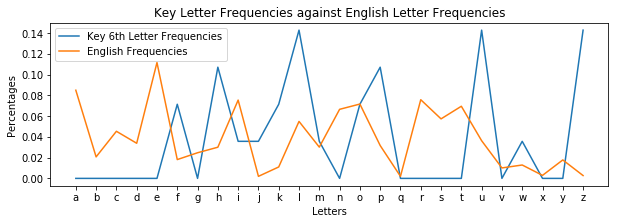

In [126]:
#Plotting the frequencies
import matplotlib.pyplot as plt

data_percentages = [x[1] for x in sorted_frequencies_percentages[1]]
print(data_percentages)
english_data = [j/100 for i,j in english_frequencies.items()]
print(english_data)

plt.figure(figsize=(10,3))
plt.plot(alphabet, data_percentages, label='Key 6th Letter Frequencies')
plt.plot(alphabet, english_data, label='English Frequencies')
plt.legend()
plt.title('Key Letter Frequencies against English Letter Frequencies')
plt.xlabel(r'Letters')
plt.ylabel(r'Percentages')
plt.show()

In [127]:
#Chi-Squared Test
test_percentages = [[x[1] for x in sorted_frequencies_percentages[i]] for i in sorted_frequencies_percentages]

cycle_list2 = []
for j in range(0,len(test_percentages)):
    append_list = []
    for n in range(0, len(test_percentages[j])):
        append_list.append(test_percentages[j][n::]+test_percentages[j][0:n:])
    cycle_list2.append(append_list)

statistical_results = []
for n in cycle_list2:
    letter_pairs =[]
    for sublist in n:
        letter_pair = alphabet[(n.index(sublist))]   #error here, need to get the right index
        chi = 0
        for j in sublist:
            value = ((j-english_data[sublist.index(j)])**2)/english_data[sublist.index(j)]
            chi+=value
        t = (letter_pair,chi)
        letter_pairs.append(t)
    statistical_results.append(letter_pairs)
#print(statistical_results)

statistical_sorted = []
for i in statistical_results:
    sorted_stats = sorted(i, key=lambda pair: pair[1])
    statistical_sorted.append(sorted_stats)

print(statistical_sorted)

for i in range(0,len(statistical_sorted)):
    print("Key Character %s" % i)
    for number in range(0,3):
        print(statistical_sorted[i][number])


[[('w', 0.8894400430829418), ('a', 1.3292062851220923), ('c', 1.605222643766396), ('n', 2.3491583668246534), ('l', 2.5419760915853993), ('h', 2.5904290058460036), ('k', 2.734074510767151), ('b', 3.0164868588237224), ('j', 3.4869614061173055), ('v', 3.553534223251667), ('m', 3.9940930585551686), ('y', 4.365234631624489), ('i', 4.513661628726077), ('p', 4.859037196874096), ('t', 5.15801521804088), ('u', 5.180955833406769), ('d', 6.3752544689678965), ('f', 7.7734922800337465), ('s', 16.57825761876501), ('g', 18.25840804143057), ('z', 18.503024742324847), ('o', 18.7249784087684), ('e', 23.859549350155394), ('r', 24.39766463422815), ('x', 24.964596924397526), ('q', 29.897452499536016)], [('u', 0.4811410052973187), ('h', 0.5523158765034365), ('l', 0.9227395109038468), ('m', 0.9472784067919688), ('q', 1.4110274298626875), ('d', 1.483706282745267), ('i', 1.862058682275936), ('f', 2.1602060078767926), ('s', 2.384660645900885), ('a', 2.5624935510979268), ('v', 2.646814684680779), ('z', 3.0187441

In [128]:
#dict_example ={0:['a','b','c','d','e','f'],1:['g','h','i','j','k','l'],2:['m','n','o','p','q','r']}
statistical_sorted_shortened = {}
for i in range(0,len(statistical_sorted)):
    sublist = []
    for j in range(0,3):
        sublist.append(statistical_sorted[i][j][0])
    statistical_sorted_shortened[i]=sublist

#My combinations function
potential_keys =[]
def combine_test(dictionary,string_in,n):
    for i in range(0,len(dictionary[n])):
        string_out = string_in + dictionary[n][i]
        if n==len(dictionary)-1:
            potential_keys.append(string_out)
        else:
            n+=1
            combine_test(dictionary, string_out,n)
            n-=1
            
#Other Combination Function
def combine(pre, n, m):
    
    result = []
    if len(pre) == n-1:
        for i in range(m):
            result.append(pre + dictoflists[len(pre)][i])
        return result
    for i in range(m):
        result.extend(combine(pre + dictoflists[len(pre)][i], n, m))
    return result
#print(combine("", 6, 5))

combine_test(statistical_sorted_shortened,'',0)
print(len(potential_keys))

1594323


# Solutions: Deciphered Text and Key

Below are the best guesses for the key, listed from most to least likely.

Also below is the mostly likely guess for the original text.

In [129]:
decrypted = ""
key = potential_keys[0]

key_matching_string = (len(encrypted)//len(key))*key + key[:(len(encrypted)-(len(encrypted)//len(key)*len(key)))]

for i in range(0,len(encrypted)):
    j = encrypted[i]
    k=key_matching_string[i]
    number = alphabet.index(j) - alphabet.index(k)
    decrypted = decrypted + alphabet[number % 26]
    
print("\nThe text is:\n%s" % decrypted)

print("\n \nThe Key is: %s \n \n" % potential_keys[0])

print("The most likely key characters are: \n")
for i in range(0,len(statistical_sorted)):
    print("Letter %s" % i)
    for number in range(0,3):
        print(statistical_sorted[i][number][0])


The text is:
tuiacardoftenslmjolizesacrifiathatcannotoeivoidedaprosocndchangethntveedstobecoafzontedandacpexteditevokeftpeideaofatencperatherapiftwraguidebutvnicrisistherriaanequalposfijilitythattuepermitwillrrnmwhimselforqimhethereforratsoreferstocodertysolituqeindevendecalavddegeneratvovhecanbeseeaaaavagrantorrvmnanalcoholvcehoishidingnqcartofredwiaeqnhislantera

 
The Key is: wualisthecode 
 

The most likely key characters are: 

Letter 0
w
a
c
Letter 1
u
h
l
Letter 2
a
q
m
Letter 3
l
a
u
Letter 4
i
e
b
Letter 5
s
w
v
Letter 6
t
x
z
Letter 7
h
l
n
Letter 8
e
p
x
Letter 9
c
y
p
Letter 10
o
h
z
Letter 11
d
w
s
Letter 12
e
p
g
